#### Data source : https://archive.ics.uci.edu/ml/datasets/heart+disease

### Importing Libraries

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### Loading the dataset

In [42]:
df = pd.read_csv("processed.cleveland.data", header=None,na_values = "?")
df = df.dropna()
display(df.head())
print(df.shape)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


(297, 14)


### Attribute Information:
#### age: age in years
#### sex: sex (1 = male; 0 = female)
#### cp: chest pain type

####    1 = typical angina
####    2 = atypical angina
####    3 = non-anginal pain
####    4 = asymptomatic


#### trestbps: resting blood pressure (in mm Hg on admission to the hospital)
#### chol: serum cholestoral in mg/dl
#### fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#### restecg: resting electrocardiographic results

####    0 = normal
####    1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
####    2 = showing probable or definite left ventricular hypertrophy by Estes' criteria


#### thalach: maximum heart rate achieved
#### exang: exercise induced angina (1 = yes; 0 = no)
#### oldpeak: ST depression induced by exercise relative to rest
#### slope: the slope of the peak exercise ST segment

####    1 = upsloping
####    2 = flat
####    3 = downsloping


#### ca: number of major vessels (0-3) colored by flourosopy
#### thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
#### hd: heart disease


### Renaming the column names

In [43]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
              'restecg', 'thalach', 'exang', 'oldpeak', 
              'slope', 'ca', 'thal', 'hd']

display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Checking for missing values and data types

In [44]:
# df.info()
df.isnull().values.any()


False

#### No missing value


### Target Variable : 'hd'

In [45]:
print(df['hd'].value_counts())

0    160
1     54
2     35
3     35
4     13
Name: hd, dtype: int64


In [46]:
df[df['hd'] > 1] = 1

print(df['hd'].value_counts())

0    160
1    137
Name: hd, dtype: int64


In [47]:
display(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,38.750842,0.730640,2.390572,94.101010,176.754209,0.367003,0.942761,112.252525,0.437710,0.787879,1.336700,0.562290,3.286195,0.461279
std,24.818501,0.444376,1.197821,59.822795,117.816094,0.482801,0.846349,71.612180,0.496942,0.742977,0.546271,0.675582,2.083294,0.499340
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,48.000000,1.000000,2.000000,120.000000,218.000000,0.000000,1.000000,149.000000,0.000000,1.000000,1.000000,0.000000,3.000000,0.000000
75%,58.000000,1.000000,3.000000,135.000000,258.000000,1.000000,2.000000,164.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,4.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,3.000000,3.000000,7.000000,1.000000


### Creating feature set and target

In [48]:
x = df.drop('hd', axis = 1)
y = df[['hd']]

print(x.shape, y.shape)

(297, 13) (297, 1)


### One-hot encoding

In [49]:
x = pd.get_dummies(x, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

display(x.head())
print(x.shape)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,0,0,0,1,0,1,0,1,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,1,0,0,0,0,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,0,1,0,1,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,1,0,0,0,1,0,0,1,0,0


(297, 19)


### Split the dataset intro train and test set

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(237, 19) (60, 19) (237, 1) (60, 1)


### Perform the training with Decision Tree Classifier

In [51]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT = model_DT.fit(x_train, y_train)

### Showing a tree diagram of the Decision Tree

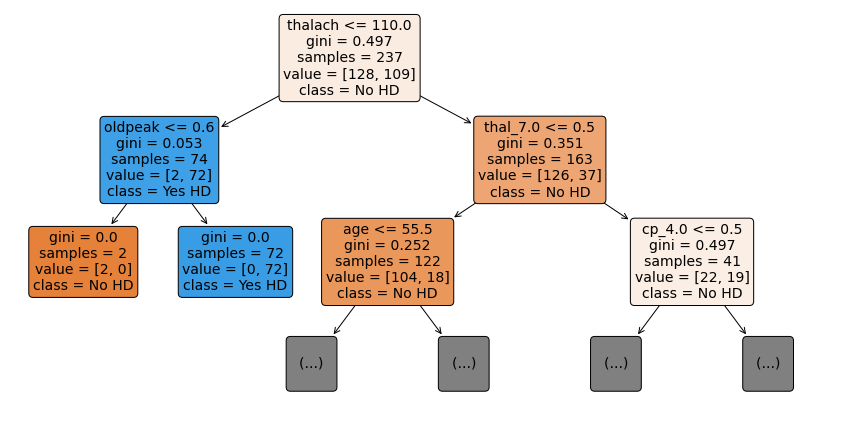

In [52]:
plt.figure(figsize = (15, 7.5))
plot_tree(model_DT, 
          filled=True,
          rounded=True,
          class_names = ["No HD", "Yes HD"],
          feature_names = x.columns,
          max_depth=2, 
          fontsize=14)

plt.show()

### Confusion Matrix

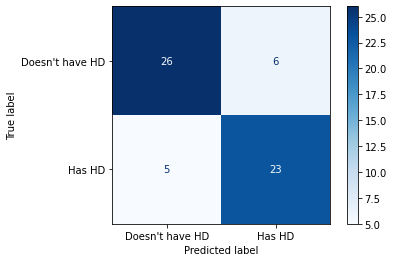

In [53]:
plot_confusion_matrix(model_DT, 
                      x_test, 
                      y_test, 
                      display_labels=["Doesn't have HD", "Has HD"],
                      cmap='Blues')
plt.show()

### Classification report

In [54]:
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [3, 4, 5, 6, 7]}

model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(x_train, y_train)

In [55]:
y_pred = np.round(grid_result.predict(x_test), 2)

In [56]:
confusion_matrix_dt = confusion_matrix(y_test, y_pred)
print('confusion_matrix: \n', confusion_matrix_dt)

print('Accuracy: ', accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

confusion_matrix: 
 [[32  0]
 [10 18]]
Accuracy:  0.8333333333333334
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        32
           1       1.00      0.64      0.78        28

    accuracy                           0.83        60
   macro avg       0.88      0.82      0.82        60
weighted avg       0.87      0.83      0.83        60



### ROC-AUC

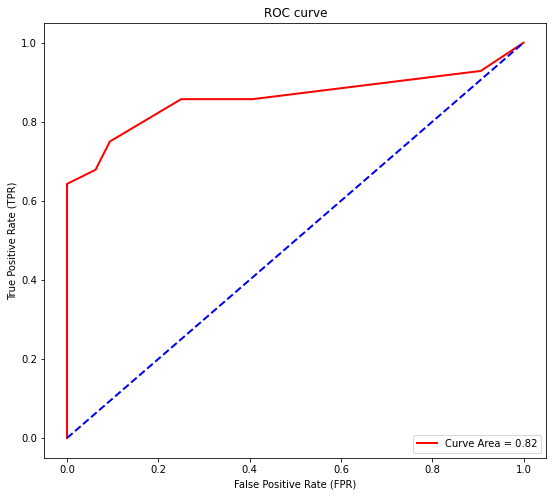

In [57]:
fpr, tpr, thr = roc_curve(y_test, grid_result.predict_proba(x_test)[:,1])
auc = np.round(roc_auc_score(y_test, y_pred), 2)

plt.figure(figsize=(9, 8))
plt.plot(fpr, 
         tpr, 
         color='red', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#### As the curve area is 0.82 so this model can be said as good model 